# Week 2

## 1. Multiple linear regression

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [7]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


### Split the training and test data

#### *To split the dataset using numpy*

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test =cdf[~msk]

## 2. Simple regresson model

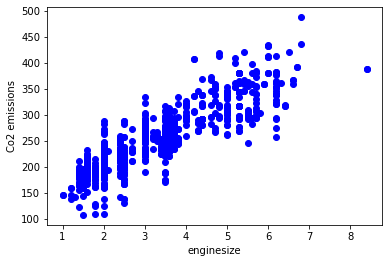

In [10]:
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'] ,color ='blue')
plt.xlabel('enginesize')
plt.ylabel('Co2 emissions')
plt.show()

In [11]:
from sklearn import linear_model

In [12]:
from sklearn.linear_model import LinearRegression

In [21]:
regr = LinearRegression()
regr

LinearRegression()

In [22]:
# train_x = np.asanyarray(train[['ENGINESIZE']])
# train_y = np.asanyarray(train[['CO2EMISSIONS']])
# Use asanyarray to turn from 1D array to nD array

regr.fit(train[['ENGINESIZE']], train['CO2EMISSIONS'])
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [38.1826504]
Intercept:  127.73245880754473


In [27]:
yhat_e = regr.predict(train[['ENGINESIZE']])

<AxesSubplot:xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

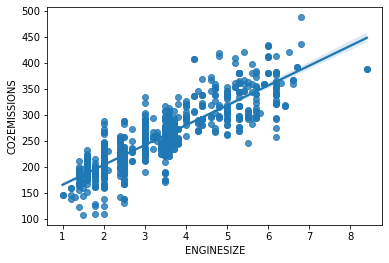

In [28]:
sns.regplot(x=train[['ENGINESIZE']],y=train['CO2EMISSIONS'])

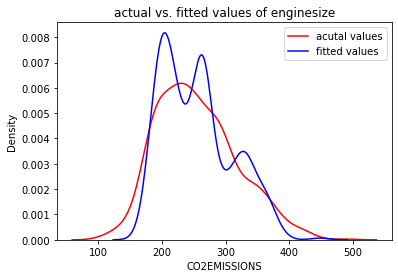

In [40]:
ax1 = sns.kdeplot(train['CO2EMISSIONS'], color = 'r', label = 'acutal values')
sns.kdeplot(yhat_e, color = 'b', label = 'fitted values', ax = ax1)
ax1.set_title('actual vs. fitted values of enginesize')
ax1.legend()
plt.show()

In [42]:
regr.score(test[['ENGINESIZE']], test['CO2EMISSIONS'])

0.8050725249324202

In [51]:
from sklearn.metrics import mean_squared_error

In [55]:
mse_s = mean_squared_error(train['CO2EMISSIONS'], yhat_e)
mse_s

976.1984583735667

## 3. Multiple regresson model

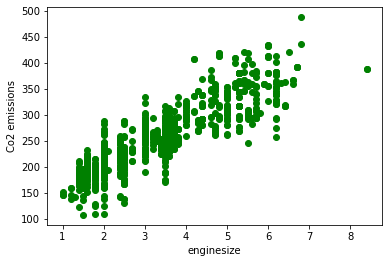

In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
plt.scatter(cdf['ENGINESIZE'], cdf['CO2EMISSIONS'] , color = 'green')
plt.xlabel('enginesize')
plt.ylabel('Co2 emissions')
plt.show()

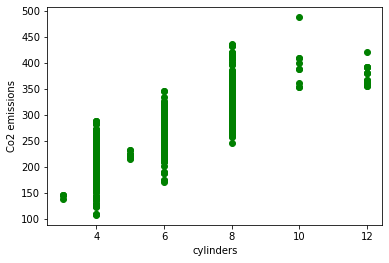

In [56]:
plt.scatter(cdf['CYLINDERS'], cdf['CO2EMISSIONS'] , color = 'green')
plt.xlabel('cylinders')
plt.ylabel('Co2 emissions')
plt.show()

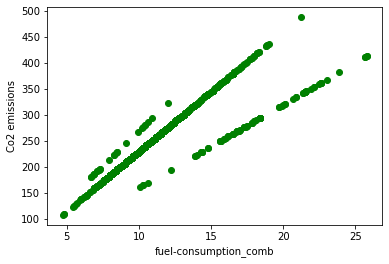

In [61]:
plt.scatter(cdf['FUELCONSUMPTION_COMB'], cdf['CO2EMISSIONS'] , color = 'green')
plt.xlabel('fuel-consumption_comb')
plt.ylabel('Co2 emissions')
plt.show()

In [67]:
x_train= train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y_train = train['CO2EMISSIONS']
regr.fit(x_train,y_train)

LinearRegression()

In [68]:
yhat_m = regr.predict(x_train)
yhat_m[0:4]

array([213.40832072, 254.27134881, 249.23582863, 243.19320441])

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

In [69]:
mse = mean_squared_error(y_train,yhat_m)
mse

539.8287884102776

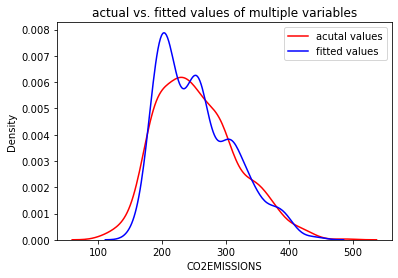

In [70]:
ax1 = sns.kdeplot(y_train, color = 'r', label = 'acutal values')
sns.kdeplot(yhat_m, color = 'b', label = 'fitted values', ax = ax1)
ax1.set_title('actual vs. fitted values of multiple variables')
ax1.legend()
plt.show()

In [71]:
x_test= test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y_test = test[['CO2EMISSIONS']]
regr.score(x_test,y_test)

0.8665521972486501

## 3. Polynomial Regression

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, *ENGINESIZE*. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:


In [85]:
from sklearn.preprocessing import PolynomialFeatures

In [116]:
poly = PolynomialFeatures(degree = 2)
x_train_pr = poly.fit_transform(train[['ENGINESIZE']])
x_test_pr = poly.fit_transform(test[['ENGINESIZE']])
poly

PolynomialFeatures()

In [117]:
lm_pr = LinearRegression()

In [118]:
y_train_pr = train[['CO2EMISSIONS']]
y_test_pr = test['CO2EMISSIONS']

In [119]:
lm_pr.fit(x_train_pr,y_train_pr)

LinearRegression()

In [120]:
yhat_pr = lm_pr.predict(x_train_pr)
yhat_pr[0:4]

array([[219.88568411],
       [264.48258171],
       [264.48258171],
       [264.48258171]])

In [121]:
mse_pr = mean_squared_error(y_train_pr,yhat_pr)
mse_pr

966.2059093171582

<AxesSubplot:xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

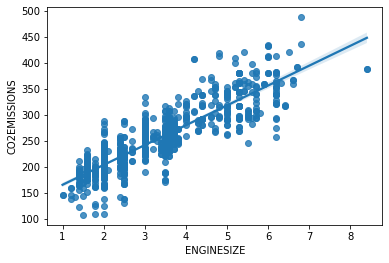

In [122]:
sns.regplot(x = train[['ENGINESIZE']], y= train[['CO2EMISSIONS']])

### visulize a polynomial regression

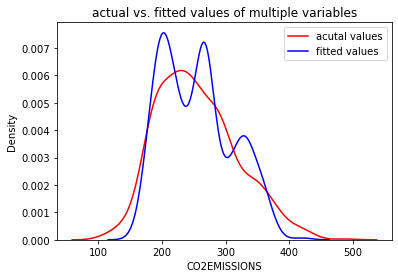

In [108]:
ax1 = sns.kdeplot(y_train_pr, color = 'r', label = 'acutal values')
sns.kdeplot(yhat_pr, color = 'b', label = 'fitted values', ax = ax1)
ax1.set_title('actual vs. fitted values of multiple variables')
ax1.legend()
plt.show()

In [109]:
lm_pr.score(x_test_pr,y_test_pr)

0.8075776020387877